In [1]:
import sys
sys.path.append("..")
from src.data import MNISTDataset
from src.metrics import compute_thickness_ground_truth, se, re
import os
os.chdir('/Users/4romain/pCloud Drive/ml_master_thesis/repo/')
cwd = os.getcwd()
print(cwd)

/Users/4romain/pCloud Drive/ml_master_thesis/repo


In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

def transform(X):
    X = X.astype('float32')

    # Normalize between 0 - 1
    X = (X - X.min())
    X = X / (X.max() - X.min())

    # Normalize between -1 - 1
    X -= 0.5
    X /= 0.5

    return X

def noisy(image):
    batch, row, col = image.shape
    mean = 0
    var = 0.01
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(batch, row, col))
    gauss = gauss.reshape(batch, row, col)
    noisy = transform(image + gauss)
    return noisy

def plot(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img)

               index          area        length     thickness         slant  \
count   39972.000000  39972.000000  39972.000000  39972.000000  39972.000000   
mean   172183.836135    161.014929     39.359217      4.324099      0.097306   
std    104469.914914     85.314037     11.188453      2.094610      0.248982   
min        18.000000     10.812500      9.035534      0.810550     -0.923000   
25%     74468.250000     86.937500     32.281223      2.391540     -0.074123   
50%    178016.000000    155.062500     39.688077      4.253546      0.093428   
75%    259925.250000    223.250000     47.223611      6.167619      0.271035   
max    359977.000000    466.625000     80.815494      7.999578      1.064476   

              width        height         digit  
count  39972.000000  39972.000000  39972.000000  
mean      14.169265     20.320842      4.470079  
std        4.131968      1.989380      2.875417  
min        2.642907      7.917109      0.000000  
25%       11.594429     19.28

  1%|          | 2/313 [00:12<33:55,  6.54s/it]

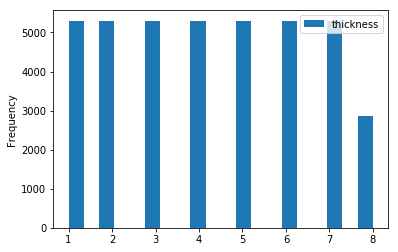

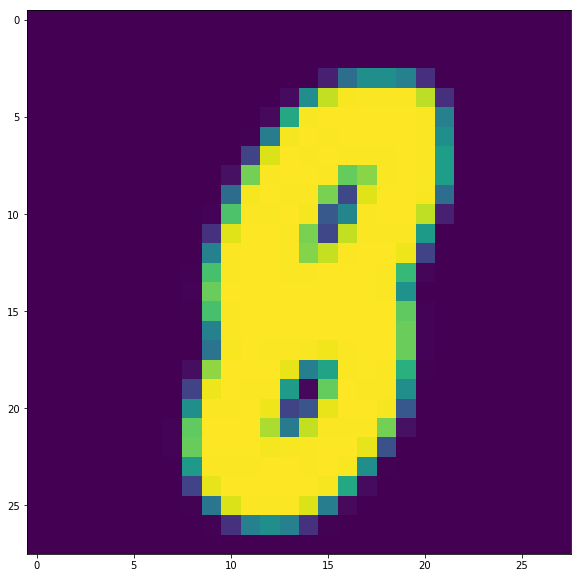

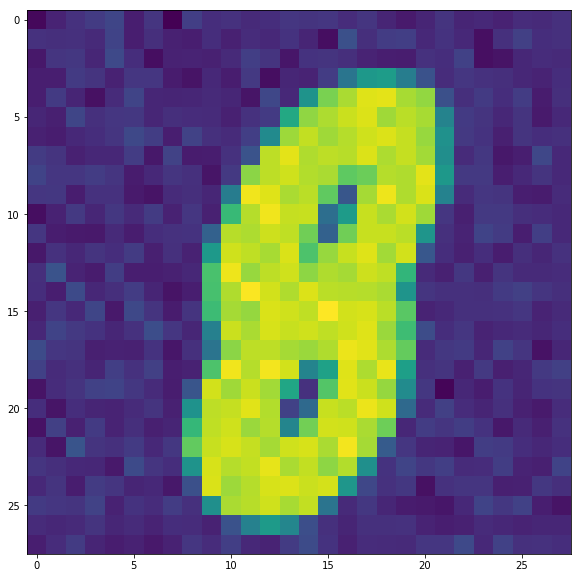

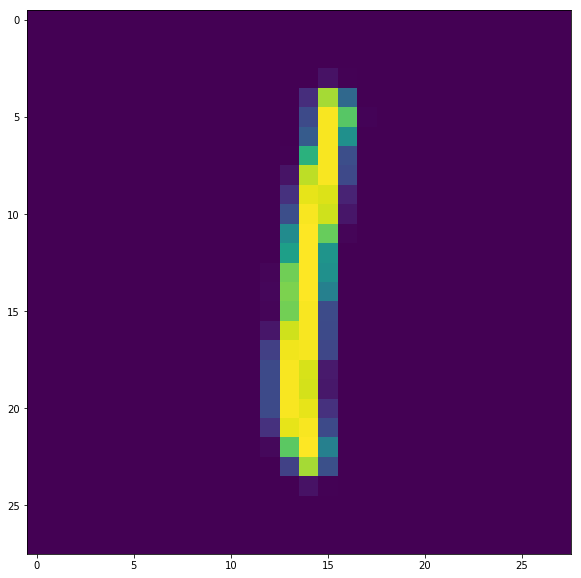

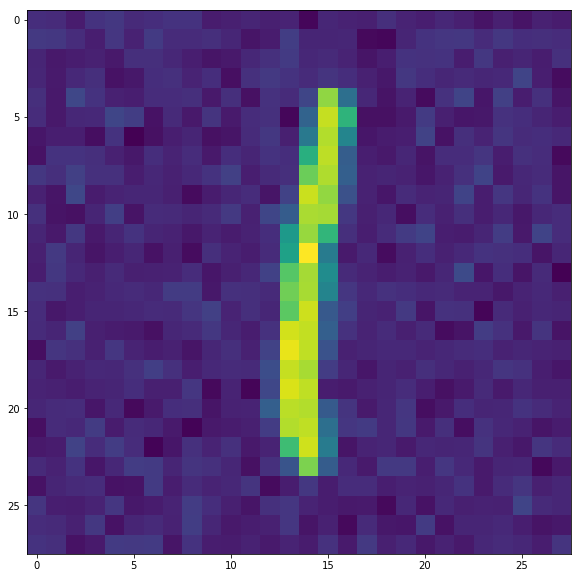

In [3]:
from torch.utils.data import DataLoader
from tqdm import tqdm

full_data = MNISTDataset('full', 'thickness', data_type='processed/original_thic_resample')
dataloader = DataLoader(dataset=full_data,
                          batch_size=128,
                          shuffle=True,
                          num_workers=16)

import pandas as pd
import numpy as np

res = pd.DataFrame(columns=['label', 'prediction', 'se', 're'])
for i, (imgs, labels) in enumerate(tqdm(dataloader)):
    if i > 1:
        break

    plot(imgs.squeeze(1).numpy()[0])
    imgs = noisy(imgs.squeeze(1).numpy())
    plot(imgs[0])
    
    pred = compute_thickness_ground_truth(imgs)
    df = pd.DataFrame(labels.numpy(), columns=['label'])
    df['prediction'] = pred
    df['se'] = se(pred, labels)
    df['re'] = re(pred, labels)
    res = res.append(df)

               index          area        length     thickness         slant  \
count   39972.000000  39972.000000  39972.000000  39972.000000  39972.000000   
mean   172183.836135    161.014929     39.359217      4.324099      0.097306   
std    104469.914914     85.314037     11.188453      2.094610      0.248982   
min        18.000000     10.812500      9.035534      0.810550     -0.923000   
25%     74468.250000     86.937500     32.281223      2.391540     -0.074123   
50%    178016.000000    155.062500     39.688077      4.253546      0.093428   
75%    259925.250000    223.250000     47.223611      6.167619      0.271035   
max    359977.000000    466.625000     80.815494      7.999578      1.064476   

              width        height         digit  
count  39972.000000  39972.000000  39972.000000  
mean      14.169265     20.320842      4.470079  
std        4.131968      1.989380      2.875417  
min        2.642907      7.917109      0.000000  
25%       11.594429     19.28











  0%|          | 0/313 [00:00<?, ?it/s]

0.4512198308600323
-0.44081089966680276
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<14:03,  6.64s/img]










100%|##########| 128/128 [00:06<00:00, 19.26img/s]









  0%|          | 1/313 [00:06<36:16,  6.98s/it]

0.415274192028962
-0.4166854216856976
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:28,  6.37s/img]










100%|##########| 128/128 [00:06<00:00, 20.10img/s]









  1%|          | 2/313 [00:13<35:29,  6.85s/it]

0.43943556951867396
-0.44252725752078964
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:05,  6.19s/img]










100%|##########| 128/128 [00:06<00:00, 20.67img/s]









  1%|          | 3/313 [00:19<34:41,  6.71s/it]

0.4423777131792692
-0.4674269065869421
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:38,  6.45s/img]










100%|##########| 128/128 [00:06<00:00, 19.85img/s]









  1%|▏         | 4/313 [00:26<34:30,  6.70s/it]

0.4697548364107633
-0.4416231877455057
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:15,  6.26s/img]










100%|##########| 128/128 [00:06<00:00, 20.42img/s]









  2%|▏         | 5/313 [00:33<34:01,  6.63s/it]

0.450279247166967
-0.4130378425805041
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:36,  6.43s/img]










100%|##########| 128/128 [00:06<00:00, 19.91img/s]









  2%|▏         | 6/313 [00:39<33:56,  6.63s/it]

0.4609597289074219
-0.4295037555710714
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:26,  6.35s/img]










100%|##########| 128/128 [00:06<00:00, 20.14img/s]









  2%|▏         | 7/313 [00:46<33:46,  6.62s/it]

0.4381889842615033
-0.4796349873609305
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:12,  6.24s/img]










100%|##########| 128/128 [00:06<00:00, 20.50img/s]









  3%|▎         | 8/313 [00:52<33:28,  6.58s/it]

0.5040505087594043
-0.4422259278780006
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<12:52,  6.08s/img]










100%|##########| 128/128 [00:06<00:00, 21.03img/s]









  3%|▎         | 9/313 [00:59<32:55,  6.50s/it]

0.4312323098440934
-0.39301239258997533
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:38,  6.44s/img]










100%|##########| 128/128 [00:06<00:00, 19.86img/s]









  3%|▎         | 10/313 [01:05<33:03,  6.55s/it]

0.3906284551379074
-0.4371462341961594
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:49,  6.53s/img]










100%|##########| 128/128 [00:06<00:00, 19.59img/s]









  4%|▎         | 11/313 [01:12<33:18,  6.62s/it]

0.45434722031440056
-0.4879661521668271
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<12:47,  6.05s/img]










100%|##########| 128/128 [00:06<00:00, 21.16img/s]









  4%|▍         | 12/313 [01:18<32:42,  6.52s/it]

0.4260686039080769
-0.4239024362944432
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<12:46,  6.04s/img]










100%|##########| 128/128 [00:06<00:00, 21.18img/s]









  4%|▍         | 13/313 [01:25<32:15,  6.45s/it]

0.4421784573204713
-0.44021496611154814
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:04,  6.18s/img]










100%|##########| 128/128 [00:06<00:00, 20.71img/s]









  4%|▍         | 14/313 [01:31<32:01,  6.43s/it]

0.40898053076684077
-0.4230391398902442
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<14:00,  6.62s/img]










100%|##########| 128/128 [00:06<00:00, 19.33img/s]









  5%|▍         | 15/313 [01:38<32:34,  6.56s/it]

0.4126158706548889
-0.4601069809551193
1.0
-1.0













  0%|          | 0/128 [00:00<?, ?img/s]










  1%|          | 1/128 [00:06<13:49,  6.53s/img]










100%|##########| 128/128 [00:06<00:00, 19.60img/s]









  5%|▌         | 16/313 [01:45<32:39,  6.60s/it]

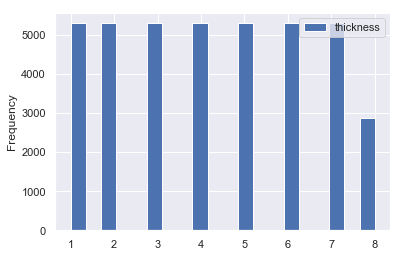

In [25]:
from torch.utils.data import DataLoader
from tqdm import tqdm

full_data = MNISTDataset('full', 'thickness', data_type='processed/original_thic_resample')
dataloader = DataLoader(dataset=full_data,
                          batch_size=128,
                          shuffle=True,
                          num_workers=16)

import pandas as pd
import numpy as np

res = pd.DataFrame(columns=['label', 'prediction', 'se', 're'])
for i, (imgs, labels) in enumerate(tqdm(dataloader)):
    if i > 15:
        break
    imgs = noisy(imgs.squeeze(1).numpy())
    pred = compute_thickness_ground_truth(imgs)
    df = pd.DataFrame(labels.numpy(), columns=['label'])
    df['prediction'] = pred
    df['se'] = se(pred, labels)
    df['re'] = re(pred, labels)
    res = res.append(df)

             se        re
digit                    
1.0    0.019795  0.127812
2.0    0.008212  0.072672
3.0    0.008242  0.069543
4.0    0.018726  0.103582
5.0    0.044840  0.156350
6.0    0.078450  0.193912
7.0    0.136795  0.272230
8.0    0.287807  0.344967


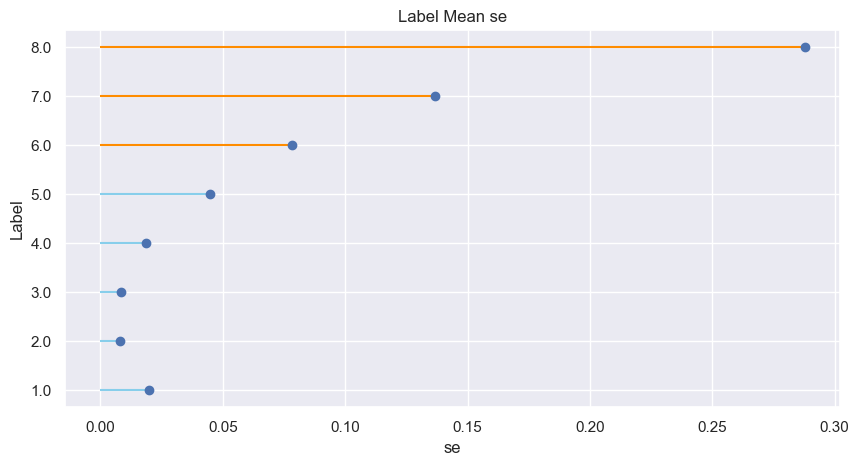

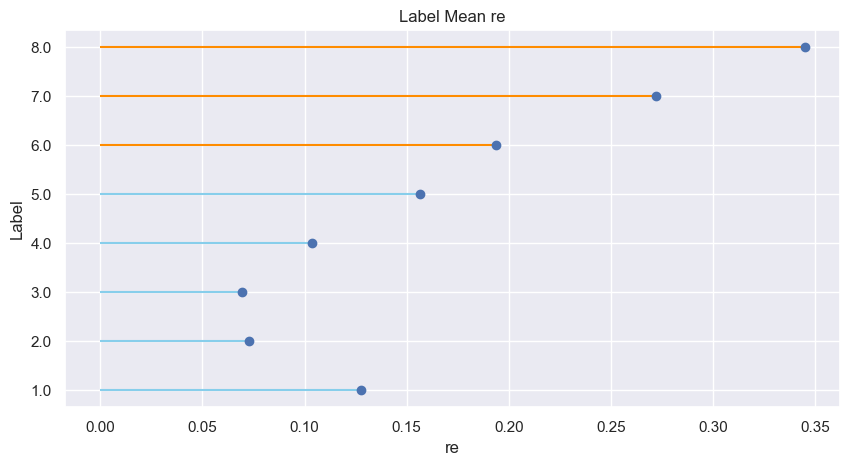

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

def plot_hline(df_results, col):
    my_range=range(1,len(df_results.index)+1)
    plt.subplots(figsize=(10,5), dpi=100)
    plt.hlines(y=my_range, xmin=0, xmax=df_results[col], color=['skyblue',
                                                                  'skyblue',
                                                                  'skyblue',
                                                                  'skyblue',
                                                                  'skyblue',
                                                                  'darkorange',
                                                                  'darkorange',
                                                                  'darkorange',
                                                                  'darkorange'])
    plt.plot(df_results[col], my_range, "o")

    # Add titles and axis names
    plt.yticks(my_range, df_results.index)
    plt.title(f"Label Mean {col}")
    plt.xlabel(col)
    plt.ylabel('Label')
    plt.savefig('Black-box_Optimization_via_Deep_Generative-Exploratory_Networks/notebooks/ground_truth_'+col+'.png')

res['digit'] = np.around(res['label'].values, decimals=0)

res.groupby('digit')['se', 're'].mean()

#df_acc['label'] = np.around(trainset.scaler.inverse_transform(df_acc['label_norm'].values.reshape(-1, 1)).squeeze())
#print(df_acc.groupby(['label'])['forward', 'morpho'].mean())

df_results = res.groupby('digit')['se', 're'].mean()
print(df_results)

plot_hline(df_results, 'se')
plot_hline(df_results, 're')

In [27]:
res

,label,prediction,se,re,digit
0,3.010605,3.170187,0.025466,0.159582,3.0
1,2.019033,2.023929,0.000024,0.004895,2.0
2,1.276116,1.348427,0.005229,0.072310,1.0
3,7.351262,7.097086,0.064605,0.254175,7.0
4,1.561982,1.720460,0.025115,0.158478,2.0
5,3.510199,3.463679,0.002164,0.046520,4.0
6,3.520351,3.415466,0.011001,0.104885,4.0
7,1.975101,2.025652,0.002555,0.050551,2.0
8,7.446565,7.426936,0.000385,0.019629,7.0
9,4.939794,5.139579,0.039914,0.199785,5.0
